In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget



data=pd.read_csv("long_mag.dat", sep=",")

## Lets find for which Ls the critical h is computable

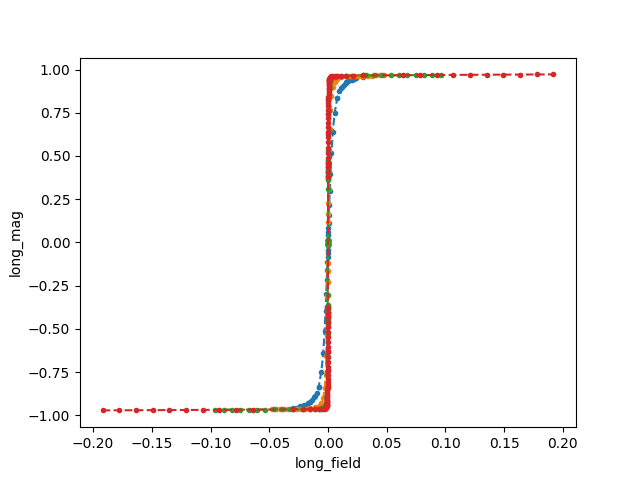

In [64]:
fig1,ax1=plt.subplots()

for L in range(4,8):
    filtered_data1=data[data["L"] == L]
    filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
    plt.plot(np.sort(filtered_data2['h']), np.sort(filtered_data2['long_mag']),marker="." , ls="--")
plt.xlabel("long_field")
plt.ylabel("long_mag")

plt.show()

$L \in [4,7]$ seems okay

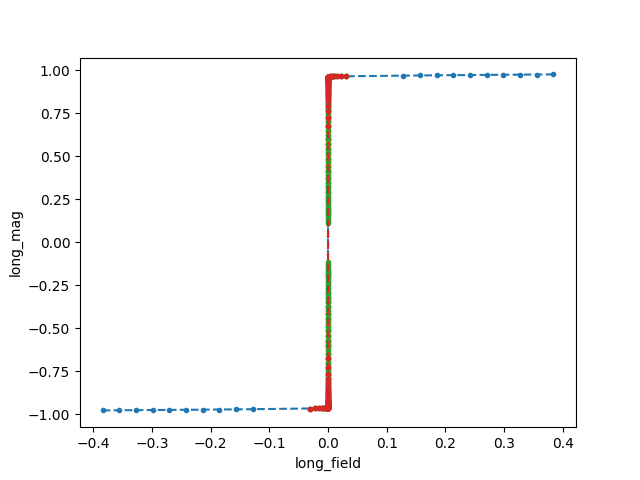

In [65]:
fig2,ax2=plt.subplots()

for L in range(8,12):
    filtered_data1=data[data["L"] == L]
    filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
    plt.plot(np.sort(filtered_data2['h']), np.sort(filtered_data2['long_mag']),marker="." , ls="--")
plt.xlabel("long_field")
plt.ylabel("long_mag")
#THey have to span 2 order of magnitudes with the hcrit at the center
plt.show()

$L \in [8,11]$ also seems fine ($L=10$ is a bit problematic)

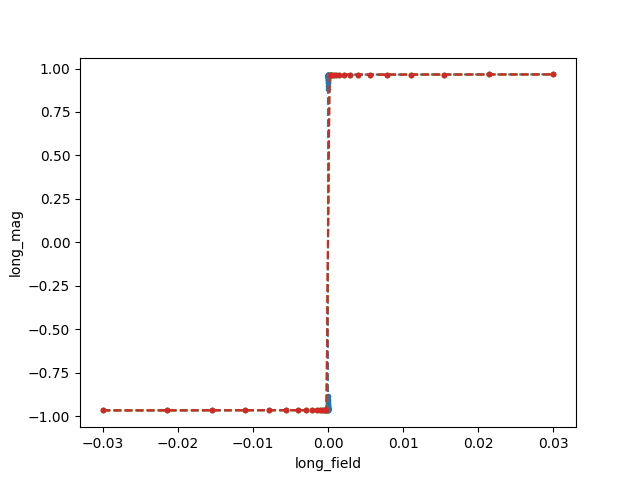

In [66]:
fig3,ax3=plt.subplots()

for L in range(12,16):
    filtered_data1=data[data["L"] == L]
    filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
    plt.plot(np.sort(filtered_data2['h']), np.sort(filtered_data2['long_mag']),marker="." , ls="--")
plt.xlabel("long_field")
plt.ylabel("long_mag")
plt.show()

from $12$ onward, the data are unusable

Lets compute the $h_{critical}(L)$ for $L \in [3,11]$

In [67]:
def stupid_derivative(xs: np.ndarray,ys: np.ndarray)->np.ndarray:
    return (ys[:-1]-ys[1:])/(xs[:-1]-xs[1:])
def stupid_coarsing(xs: np.ndarray)->np.ndarray:
    return (xs[1:]+xs[:-1])/2
def zero_crossings(xs, ys):
    zero_crossings=[]
    for i in range(1, len(xs)):
        if ys[i-1]*ys[i]<=0:
            new_zero_crossing = xs[i - 1] + (xs[i] - xs[i - 1]) * (0 - ys[i - 1]) / (ys[i] - ys[i - 1])
            zero_crossings.append(new_zero_crossing)
    return np.array(zero_crossings)

In [68]:
def relevant_data_points(data,L,g):
    filtered_data=data[(data["L"]==L) & (data["g"]==g)]
    xs=np.sort(filtered_data["h"])
    ys=np.sort(filtered_data["long_mag"])
    return xs,ys

In [69]:
g=0.5
L=6
hcrits=[]

hs, long_mags=relevant_data_points(data,L,g)
hs1,long_mags1=stupid_coarsing(hs), stupid_derivative(hs,long_mags)
hs2,long_mags2=stupid_coarsing(hs1), stupid_derivative(hs1,long_mags1)
hs3,long_mags3=stupid_coarsing(hs2), stupid_derivative(hs2,long_mags2)
hcrits_Lg=zero_crossings(hs3,long_mags3)
hcrit=np.max(hcrits_Lg)
hcrits.append(hcrit)

In [70]:
print(hcrit)

0.0002977079173898323


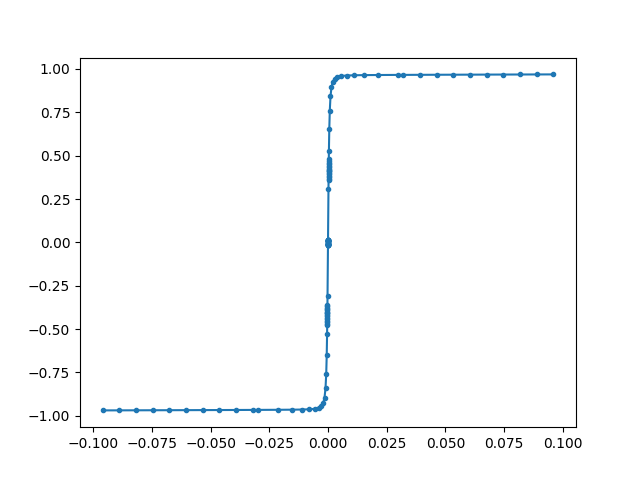

In [71]:
f0,a0=plt.subplots()
plt.plot(hs,long_mags, marker=".")
plt.show()

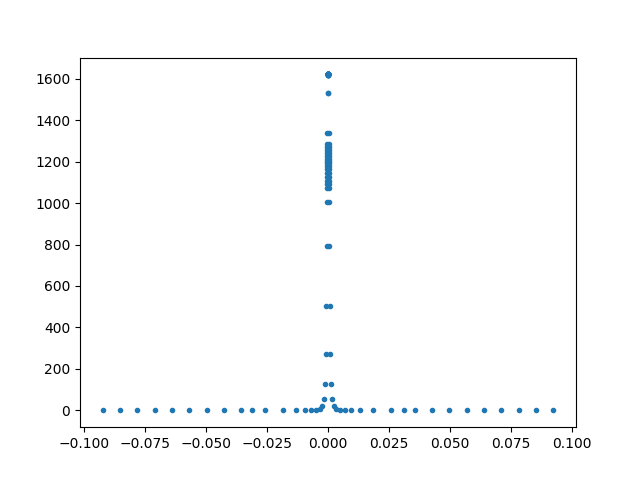

In [72]:
f1,a1=plt.subplots()
plt.plot(hs1,long_mags1, marker=".", ls="")
plt.show()

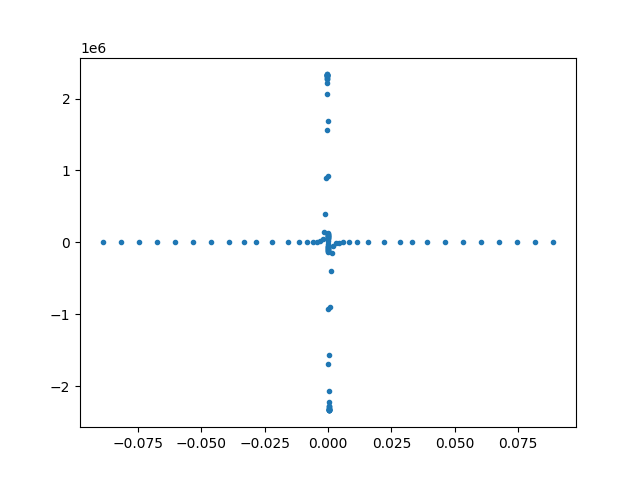

In [73]:
f2,a2=plt.subplots()
plt.plot(hs2,long_mags2, marker=".", ls="")
plt.show()

[0.0002977079173898323]


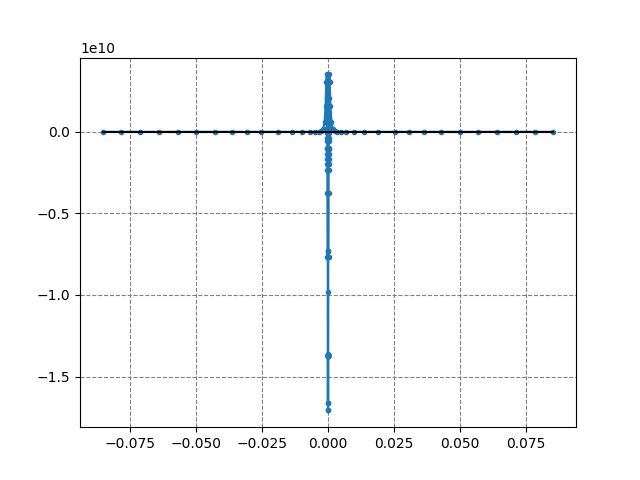

In [74]:
f3,a3=plt.subplots()
plt.plot(hs3,long_mags3, marker=".")
plt.plot(hs3,[0 for _ in range(len(hs3))], color="black")
plt.grid(color="gray", ls="--")
print(hcrits)
plt.show()

In [75]:
g=0.5
Ls=range(3,12)
hcrits=[]
for L in Ls:
    hs, long_mags=relevant_data_points(data,L,g)
    hs1,long_mags1=stupid_coarsing(hs), stupid_derivative(hs,long_mags)
    hs2,long_mags2=stupid_coarsing(hs1), stupid_derivative(hs1,long_mags1)
    hs3,long_mags3=stupid_coarsing(hs2), stupid_derivative(hs2,long_mags2)
    hcrits_Lg=zero_crossings(hs3,long_mags3)
    hcrit=np.max(hcrits_Lg)
    hcrits.append(hcrit)


C:\Users\Bruno\AppData\Local\Temp\ipykernel_16764\2676248645.py:2: RuntimeWarning: invalid value encountered in divide
  return (ys[:-1]-ys[1:])/(xs[:-1]-xs[1:])


In [78]:
hcrits

[0.007487399099998267,
 0.0023393954004191984,
 0.0008179769317825481,
 0.0002977079173898323,
 0.00011661023638953007,
 4.705517856864397e-05,
 1.9614149448830412e-05,
 8.31566120145462e-06,
 6.353547345448425e-06]

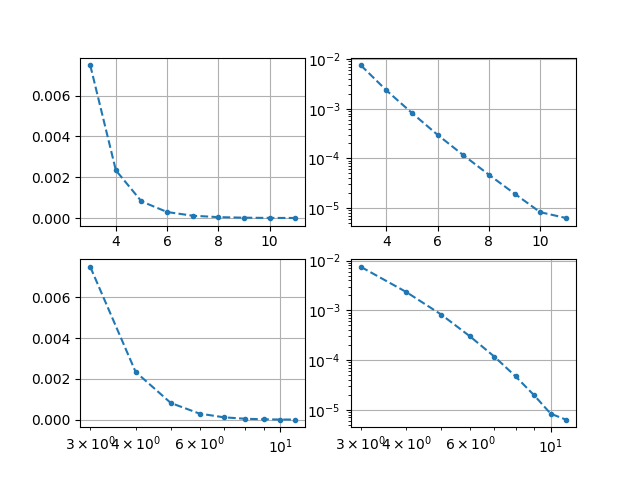

In [76]:
fig4, ax4=plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        ax4[i,j].plot(Ls, hcrits, marker=".", ls="--")
        ax4[i,j].grid()
        if i==1:
            ax4[i,j].set_xscale("log")
        if j==1:
            ax4[i,j].set_yscale("log")

plt.show()

## Now we fit the nice, line-looking graph

In [82]:
Ls=range(3,11)
ys=np.log10(hcrits)[:-1]
def model (x,m,q):
    return m*x+q
from scipy.optimize import curve_fit
popt,pcov=curve_fit(model, Ls, ys)

In [94]:
mopt, qopt= popt
mopt

-0.4189424373440937

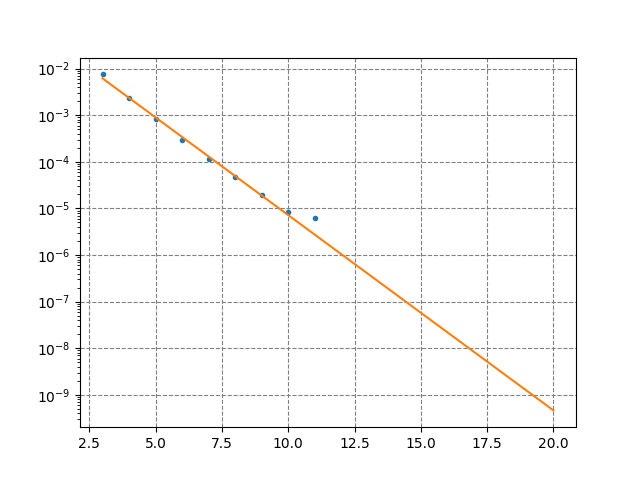

In [96]:
Lsdata=range(3,12)
fig5,ax5=plt.subplots(1,1)
ax5.grid(color="gray", ls="--")
ax5.plot(Lsdata,hcrits, marker=".", ls="")
ax5.set_yscale("log")
Ls=range(3,21)
predicted_hcrits=10.0**(mopt*Ls + qopt)
ax5.plot(Ls, predicted_hcrits, ls="-")
plt.show()

In [ ]:
#Reminder: write an output file with the predicted h_crits